In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.signal import find_peaks
from windrose import WindroseAxes




- Loading the data into a dataframe

In [23]:
df = pd.read_csv('../data/benin-malanville.csv')

### 1. Summary Statistics & Missing-Value Report

In [24]:
df.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

In [4]:
df.shape

(525600, 19)

In [5]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [6]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


- Checking for duplicated rows

In [10]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [8]:
df.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

- Since the comments column has all null values I will remove that

In [25]:
df.drop(columns=['Comments'],inplace=True)

### 2. Outlier Detection & Basic Cleaning

In [26]:
selected_columns = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]
z_scores = np.abs(stats.zscore(df[selected_columns]))
outliers = (z_scores > 3).any(axis=1)
print(outliers.sum())

7740


- There are 7740 rows with outliers in the data

In [27]:
df['z_outlier'] = outliers

In [20]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,z_outlier
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,False
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,False
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,False
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,False
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,False


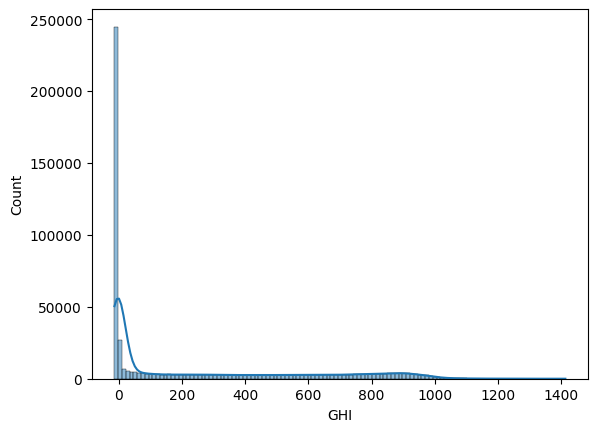

1.0284464750702857


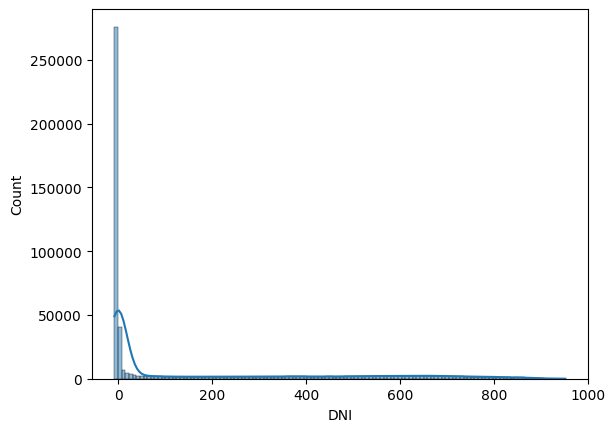

1.2902595903328247


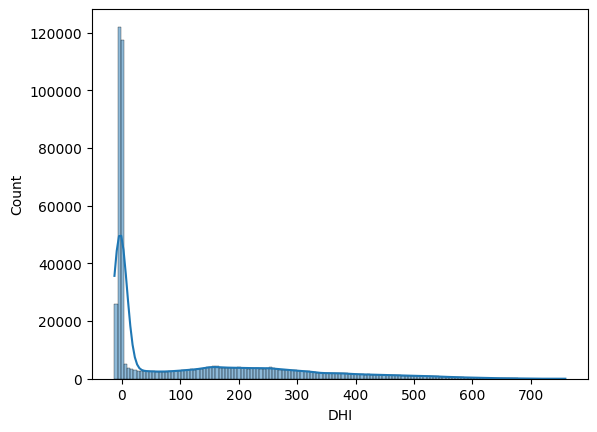

1.2104059310956665


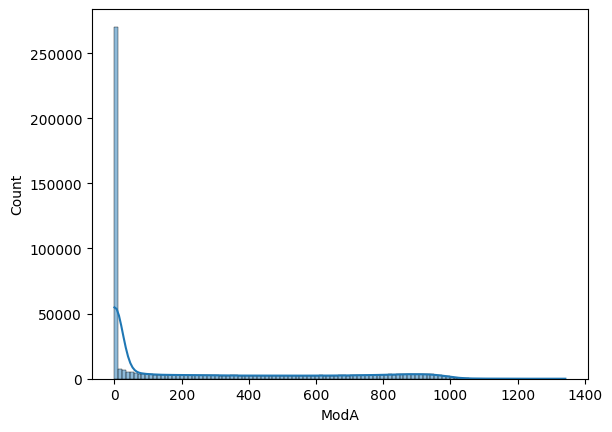

1.0674162676270473


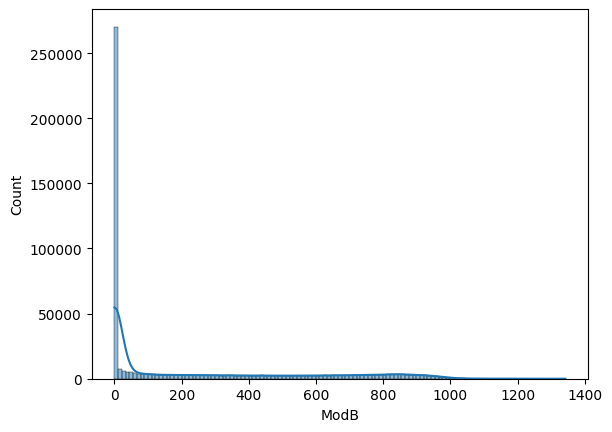

1.076031139024883


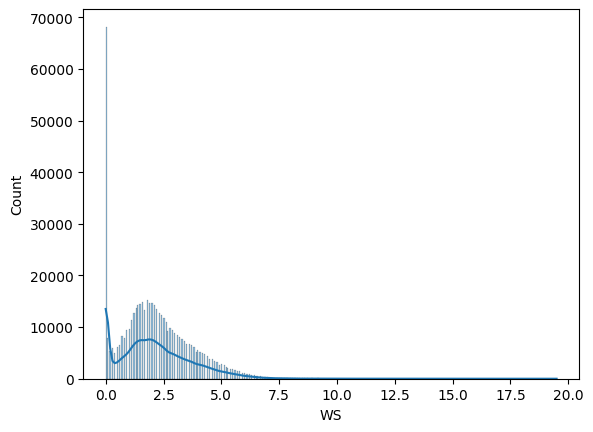

0.8684060288394488


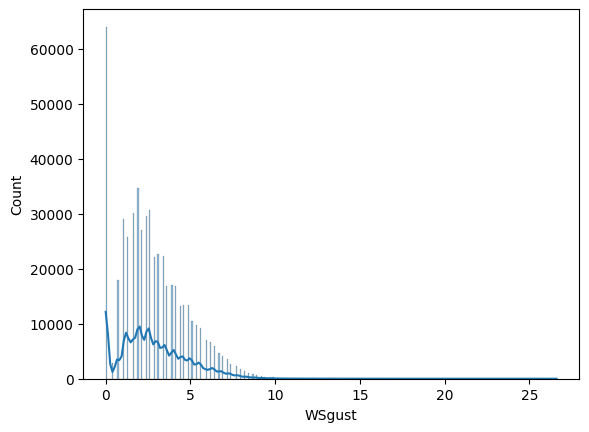

0.9289081426915101


In [16]:
for column in selected_columns:
    sns.histplot(df[column], kde=True)
    plt.show()
    print(df[column].skew())

In [19]:
df.to_csv('../data/benin_clean.csv', index=False)

### 3. Time Series Analysis

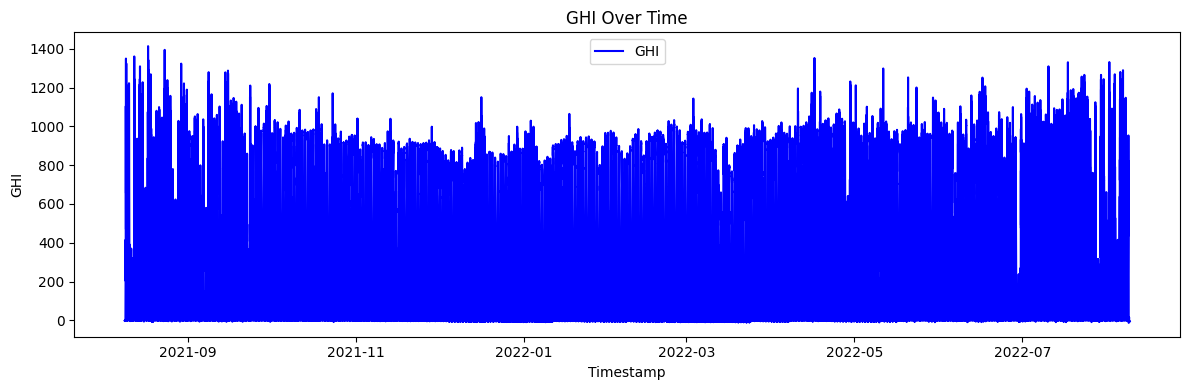

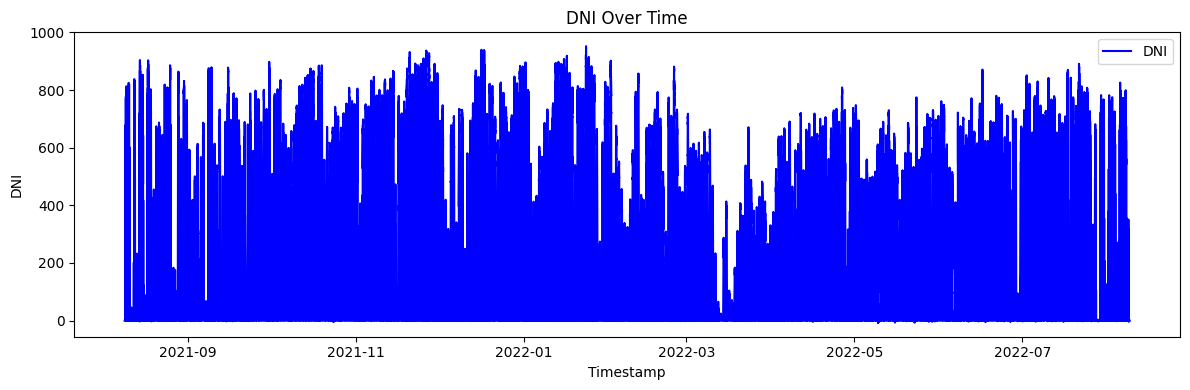

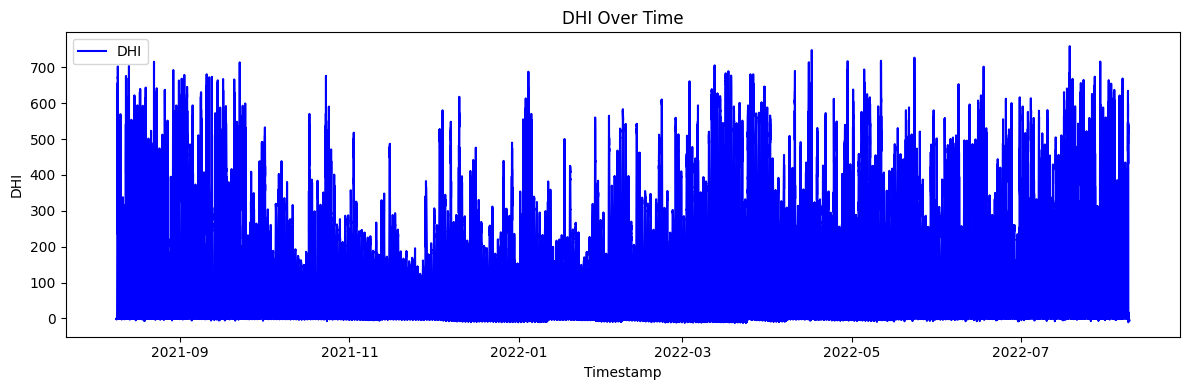

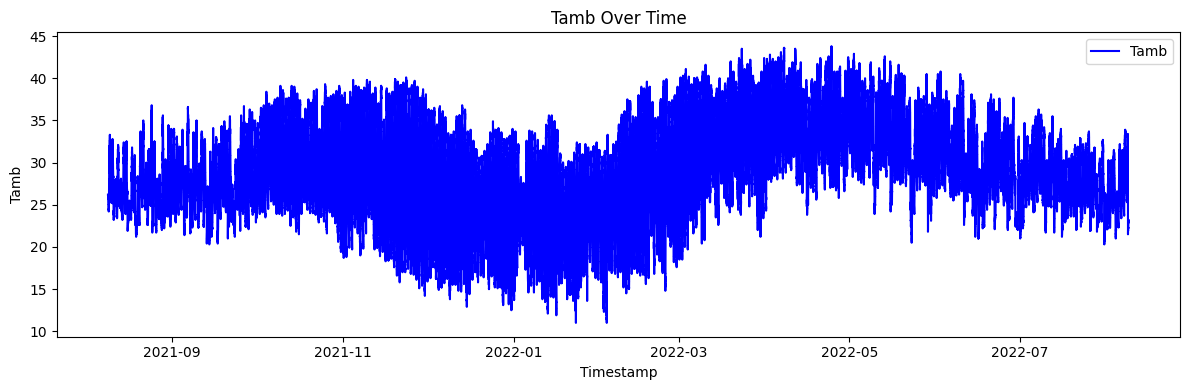

In [28]:


df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

# List of columns to plot separately
columns = ['GHI', 'DNI', 'DHI', 'Tamb']

# Create a separate plot for each column
for col in columns:
    plt.figure(figsize=(12, 4))
    plt.plot(df.index, df[col], label=col, color='blue')
    plt.title(f'{col} Over Time')
    plt.xlabel('Timestamp')
    plt.ylabel(col)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [29]:
df['Month'] = df.index.month
df['Hour'] = df.index.hour

Monthly average patters

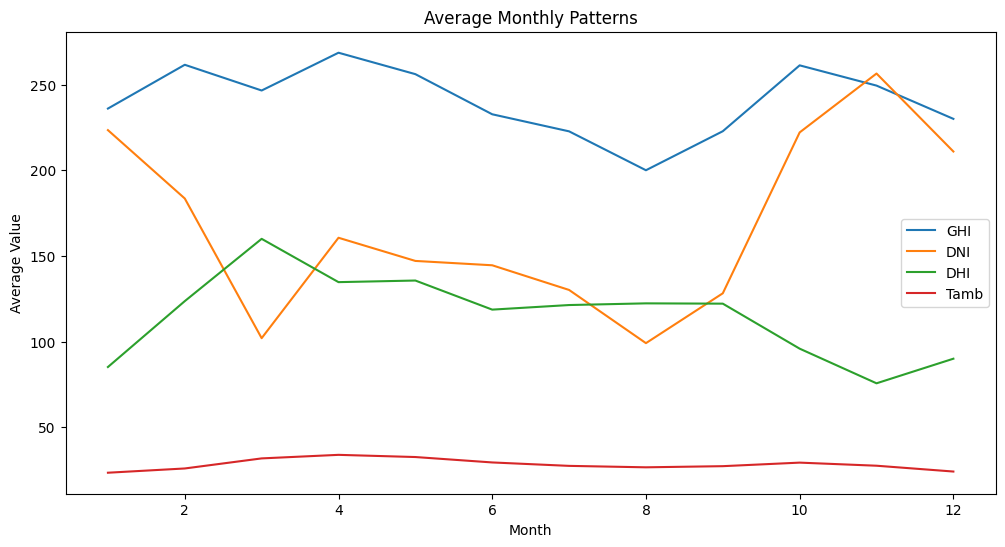

In [30]:
monthly_avg = df.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean().reset_index()

plt.figure(figsize=(12,6))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    sns.lineplot(data=monthly_avg, x='Month', y=col, label=col)

plt.title('Average Monthly Patterns')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.legend()
plt.show()

Daily trends by hours

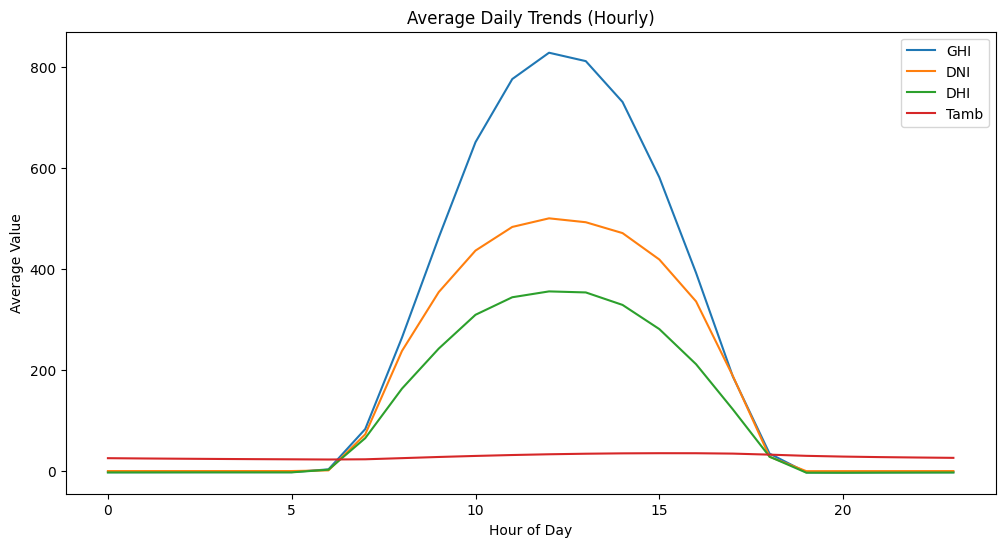

In [31]:
daily_avg = df.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean().reset_index()

plt.figure(figsize=(12,6))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    sns.lineplot(data=daily_avg, x='Hour', y=col, label=col)

plt.title('Average Daily Trends (Hourly)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Value')
plt.legend()
plt.show()

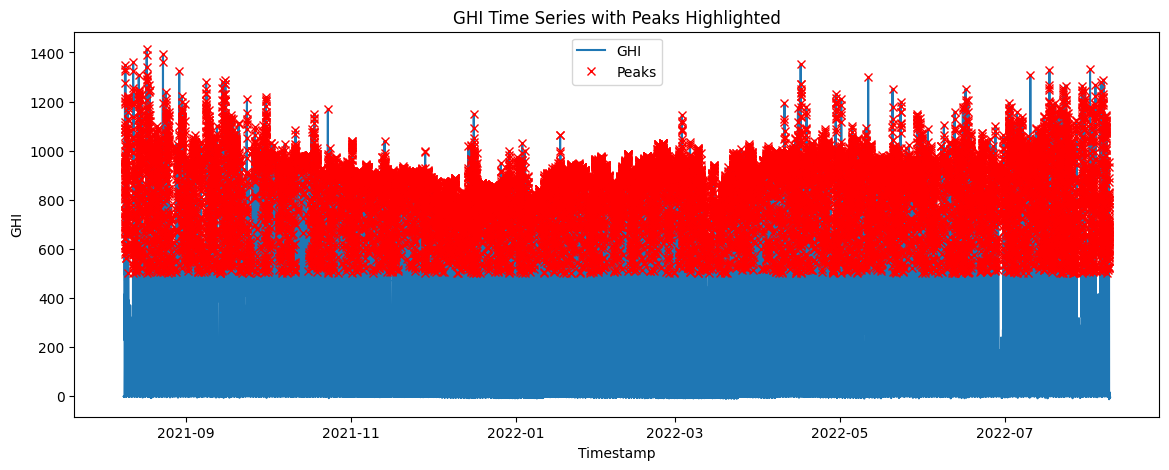

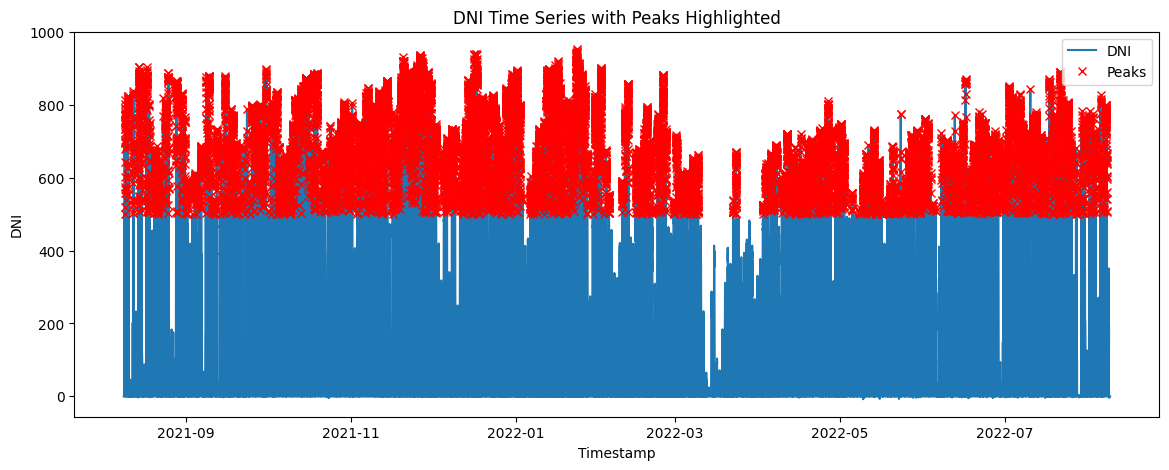

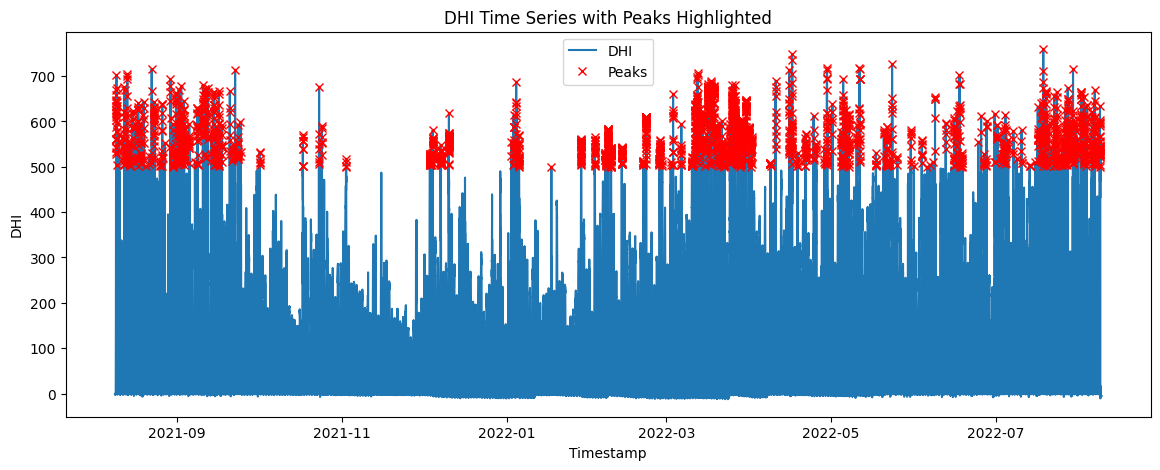

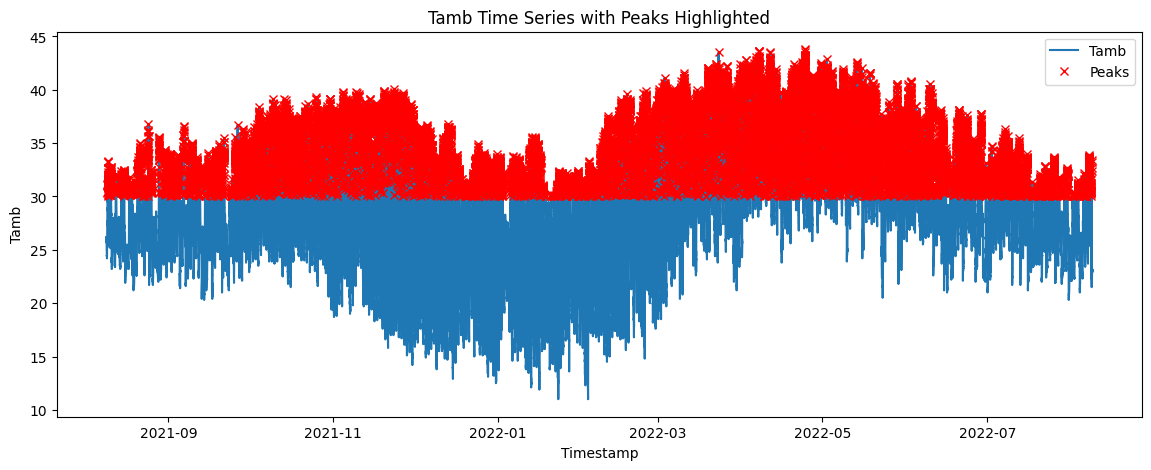

In [34]:
variables = ['GHI', 'DNI', 'DHI', 'Tamb']

for var in variables:
    values = df[var].values
    
    # Adjust height threshold per variable for meaningful peak detection
    if var == 'Tamb':
        # For temperature, peaks could be the max temperatures (adjust as needed)
        peaks, _ = find_peaks(values, height=30)  
    else:
        # For irradiance variables, set a threshold depending on typical values
        peaks, _ = find_peaks(values, height=500)
    
    plt.figure(figsize=(14, 5))
    plt.plot(df.index, values, label=var)
    plt.plot(df.index[peaks], values[peaks], "x", label='Peaks', color='red')
    plt.title(f'{var} Time Series with Peaks Highlighted')
    plt.xlabel('Timestamp')
    plt.ylabel(var)
    plt.legend()
    plt.show()

### 4. Cleaning Impact

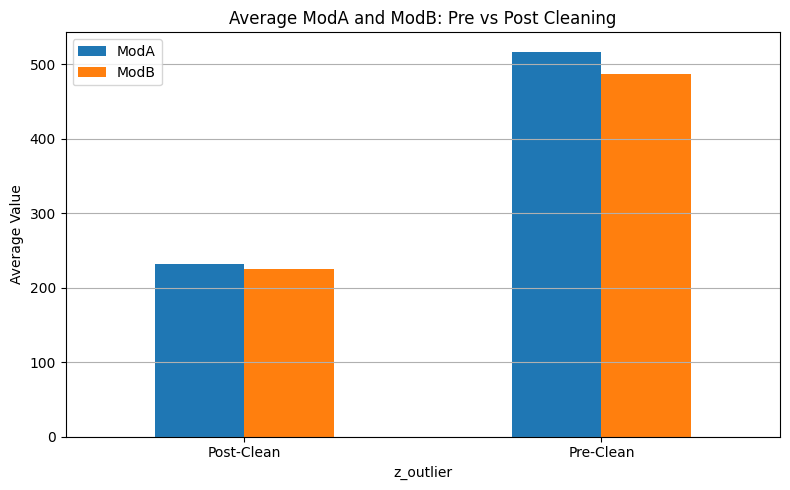

In [36]:
mean_values = df.groupby(df['z_outlier'])[['ModA', 'ModB']].mean().reset_index()
mean_values['z_outlier'] = mean_values['z_outlier'].map({True: 'Pre-Clean', False: 'Post-Clean'})

mean_values.set_index('z_outlier').plot(kind='bar', figsize=(8, 5))
plt.title('Average ModA and ModB: Pre vs Post Cleaning')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### 5. Correlation & Relationship Analysis

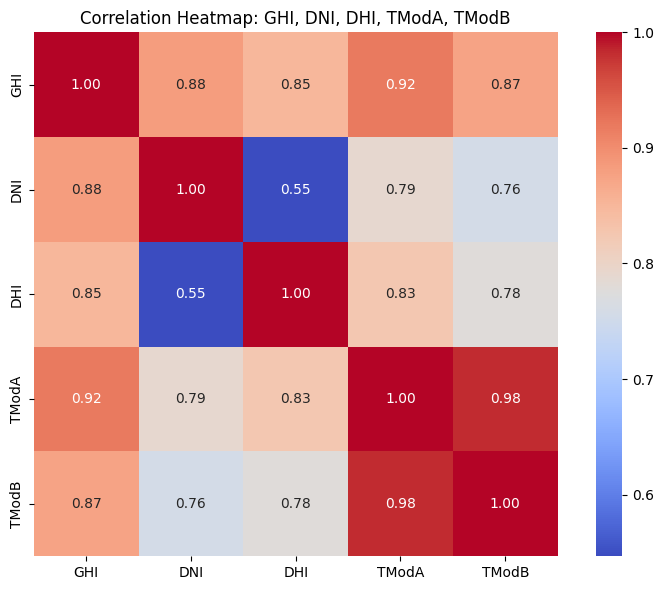

In [37]:
cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df[cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap: GHI, DNI, DHI, TModA, TModB')
plt.tight_layout()
plt.show()

### 6. Wind and Distribution Analysis

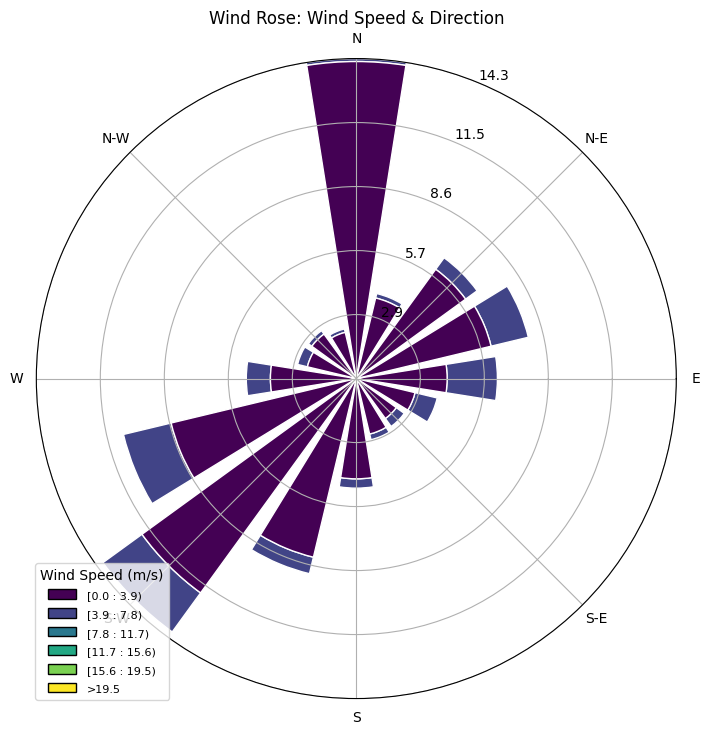

In [40]:
# Wind Rose Plot
fig = plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax(fig=fig)
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title='Wind Speed (m/s)')
plt.title('Wind Rose: Wind Speed & Direction')
plt.show()

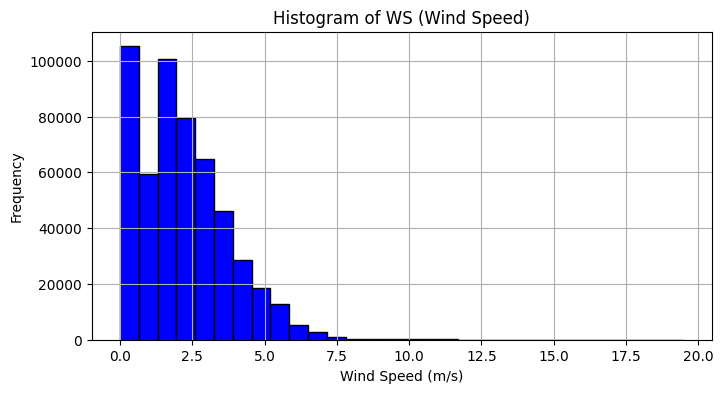

In [41]:
# Histogram for WS (Wind Speed)
plt.figure(figsize=(8, 4))
plt.hist(df['WS'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of WS (Wind Speed)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

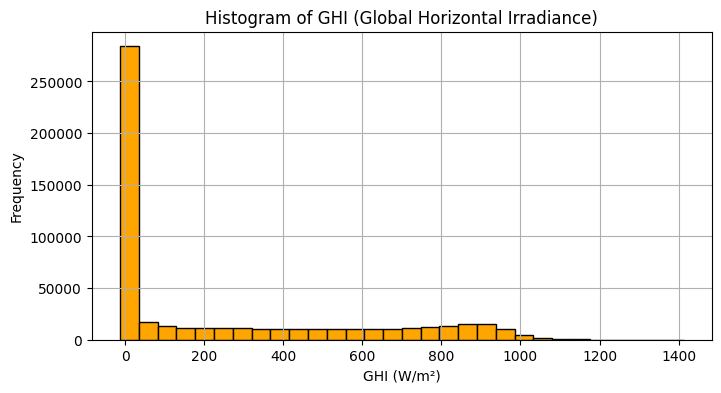

In [42]:
# Histogram for GHI
plt.figure(figsize=(8, 4))
plt.hist(df['GHI'], bins=30, color='orange', edgecolor='black')
plt.title('Histogram of GHI (Global Horizontal Irradiance)')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### 7. Temperature Analysis

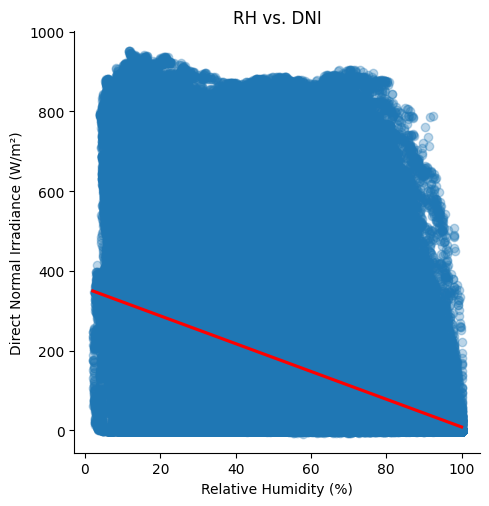

In [43]:
#  RH vs. DNI
sns.lmplot(x='RH', y='DNI', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('RH vs. DNI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Direct Normal Irradiance (W/m²)')
plt.show()

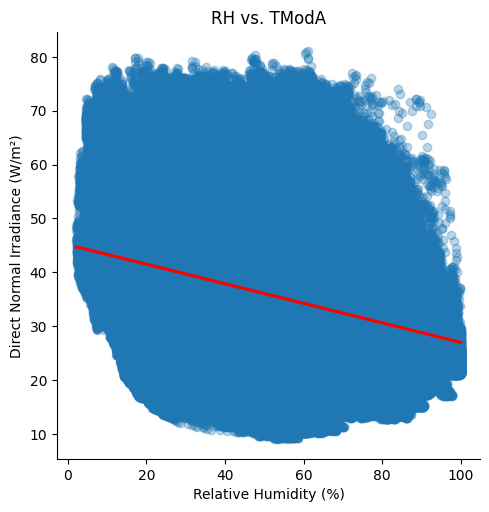

In [45]:
sns.lmplot(x='RH', y='TModA', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('RH vs. TModA')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Direct Normal Irradiance (W/m²)')
plt.show()

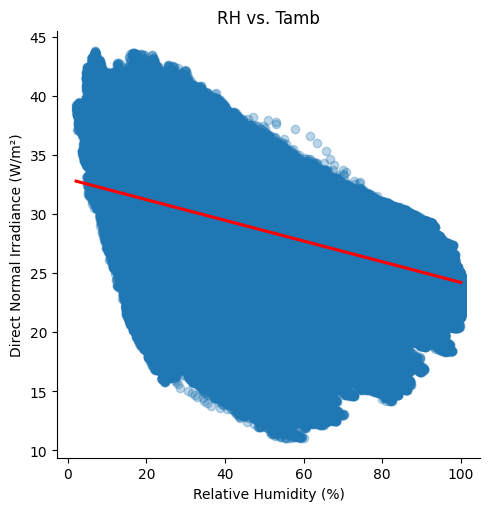

In [46]:
sns.lmplot(x='RH', y='Tamb', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('RH vs. Tamb')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Direct Normal Irradiance (W/m²)')
plt.show()

### 8. Bubble Chart

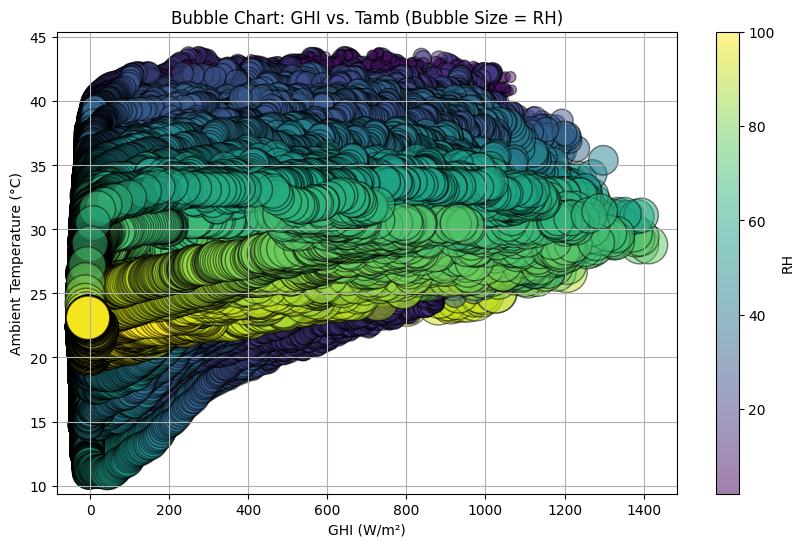

In [ ]:
bubble_var = 'RH' 
bubble_size = (df[bubble_var] - df[bubble_var].min()) / (df[bubble_var].max() - df[bubble_var].min()) * 1000
plt.figure(figsize=(10, 6))
plt.scatter(df['GHI'], df['Tamb'], s=bubble_size, alpha=0.5, c=df[bubble_var], cmap='viridis', edgecolors='k')
plt.title(f'Bubble Chart: GHI vs. Tamb (Bubble Size = {bubble_var})')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Ambient Temperature (°C)')
plt.colorbar(label=bubble_var)
plt.grid(True)
plt.show()